In [1]:
def process_string(value):
    map_d = {'maxda': 'mazda', 
    "toyouta":  "toyota",
    "vokswagen":  "vw",
    "volkswagen": "vw",}
    result = value.lower().strip().split(" ")
    name = result[0]
    if name in map_d.keys():
        name = map_d[name]
    return name


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(45) # random_state

In [3]:
def get_data(name):
    return sns.load_dataset(name)
    
mpg = get_data("mpg")

In [4]:
mpg.shape

(398, 9)

In [5]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
num_features = ["displacement", "horsepower", "weight", "acceleration"]
nominal_cat_features = ["origin"]
ordinal_cat_features = ["cylinders"]
custom_trans_features = ["name"]
skip_features = ["model_year"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = mpg.drop("mpg", axis=1)
y = mpg["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.1,
                                                   random_state=45)

In [9]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
178,4,120.0,88.0,2957,17.0,75,europe,peugeot 504
299,4,141.0,71.0,3190,24.8,79,europe,peugeot 504
360,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
313,4,151.0,90.0,2678,16.5,80,usa,chevrolet citation
52,4,88.0,76.0,2065,14.5,71,europe,fiat 124b


    without random state split or shuffle

    1 2 3 4 5 6 7 8 9 10
    
        first run   train 1, 4, 8, 9, 10, 5   test 2, 3, 6, 7  accuracy - 90%
        second run  train 1, 2, 3, 5, 7, 9    test 4, 6, 8, 10 accuracy - 80%
           ...                 ...                    ...                 ...
           
           
    
    with random seed or state    np.random.seed(45) or train_test_split(..., random_state=45)
    
        1 2 3 4 5 6 7 8 9 10
        
        first run     train   1, 2, 4, 6, 8, 10     test   3, 5, 6, 9     accuracy - 85%
        second run    train   1, 2, 4, 6, 8, 10     test   3, 5, 6, 9     accuracy - 85%

    
                       Train Sample    --> train_data --> X_train.csv and y_train.csv
     Population                        save data into files
                       Test Sample     --> test _data  --> X_test.csv and y_test.csv

    Ordinal Categories can be rank ordred
            
            letter grades   A > B > C
            reviews       best > good > average > worst
            cylinders      8 > 6 > 5 > 4 > 3
            
    Nominal Categories can not be rank ordered
    
            gender    feamle, male
            zipcode   denotes group but can not be compared
            origin     usa, japan, europe 

#### Data Tranformations 


    numerical features 
    
        dealing with missing values
        dealing with outliers
        feture engineering
        scaling
        

    Dam Water (raw water) -> pump station -> sand filter station -> small partical filteration
    
                         -> disinfecting water -> Minirals addition -> Water Bank 

    raw_data                  --->   Transformation ---> data 
    input data                --->   T()            ---> output data
    
    having missing values     --->   Transformer (T1)  ---> no missing values
    data with outliers        --->   Transformer (T2)  ---> no outliers in data
    data with N features      --->   Transformer (T3)  ---> data with (N+-M) features
    unscaled data             --->   Transformer (T4)  ---> scaled data
    categorical data          --->   Transformer (T5)  ---> numerical data
                                     Encoders
                                     
    Data Pipelines 
     

                                Data Pipeline
                      ----------------------------------------
        raw data ->          T1  -> T2  -> T3  -> T4 -> T5      ML Model Ready Data
                      -----------------------------------------

# Missing Value 

        NA -> Not Available 
        NaN -> Not a Number

    while gathering data it is possible due to some reasons like sensor is faulty, somebody refuse
    to give information, many rows contains missing values encoded as None, null, NA, NaN

In [10]:
temp = pd.DataFrame( np.random.randint(1, 20, (6, 4)),
                    columns=["A", "B", "C", "D"]
                   )

In [11]:
temp = pd.DataFrame( np.random.randint(1, 20, (6, 4)),
                    columns=["A", "B", "C", "D"]
                   )
temp.loc[[1, 3], 'A'] = np.nan
temp.loc[[2, 3], 'B'] = np.nan
temp.loc[[0, 4], 'C'] = np.nan
temp.loc[5, :] = np.nan
temp.loc[5, "D"] = 10.0

In [12]:
temp["E"] = np.nan

In [13]:
temp

,A,B,C,D,E
0,7.0,13.0,NaN,12.0,NaN
1,NaN,9.0,18.0,14.0,NaN
2,12.0,NaN,17.0,16.0,NaN
3,NaN,NaN,3.0,8.0,NaN
4,1.0,17.0,NaN,19.0,NaN
5,NaN,NaN,NaN,10.0,NaN


In [14]:
new = temp.drop(["C", "D", "E"], axis=1).copy()
# shallow copy / inplace=False
new

,A,B
0,7.0,13.0
1,NaN,9.0
2,12.0,NaN
3,NaN,NaN
4,1.0,17.0
5,NaN,NaN


In [15]:
temp.drop([1, 3, 5], axis=0)

,A,B,C,D,E
0,7.0,13.0,NaN,12.0,NaN
2,12.0,NaN,17.0,16.0,NaN
4,1.0,17.0,NaN,19.0,NaN


In [16]:
temp

,A,B,C,D,E
0,7.0,13.0,NaN,12.0,NaN
1,NaN,9.0,18.0,14.0,NaN
2,12.0,NaN,17.0,16.0,NaN
3,NaN,NaN,3.0,8.0,NaN
4,1.0,17.0,NaN,19.0,NaN
5,NaN,NaN,NaN,10.0,NaN


In [17]:
temp.dropna(axis=1)

,D
0,12.0
1,14.0
2,16.0
3,8.0
4,19.0
5,10.0


In [18]:
temp

,A,B,C,D,E
0,7.0,13.0,NaN,12.0,NaN
1,NaN,9.0,18.0,14.0,NaN
2,12.0,NaN,17.0,16.0,NaN
3,NaN,NaN,3.0,8.0,NaN
4,1.0,17.0,NaN,19.0,NaN
5,NaN,NaN,NaN,10.0,NaN


In [19]:
temp.dropna(axis=1, how="all", inplace=True)

In [20]:
temp

,A,B,C,D
0,7.0,13.0,NaN,12.0
1,NaN,9.0,18.0,14.0
2,12.0,NaN,17.0,16.0
3,NaN,NaN,3.0,8.0
4,1.0,17.0,NaN,19.0
5,NaN,NaN,NaN,10.0


In [21]:
temp.dropna(axis=0, how="all", inplace=True)

In [22]:
temp.dropna()

,A,B,C,D


In [23]:
temp

,A,B,C,D
0,7.0,13.0,NaN,12.0
1,NaN,9.0,18.0,14.0
2,12.0,NaN,17.0,16.0
3,NaN,NaN,3.0,8.0
4,1.0,17.0,NaN,19.0
5,NaN,NaN,NaN,10.0


In [24]:
temp = pd.DataFrame( np.random.randint(1, 20, (6, 4)),
                    columns=["A", "B", "C", "D"]
                   )
temp.loc[[1, 3], 'A'] = np.nan
temp.loc[[0, 3], 'C'] = np.nan

In [25]:
temp

,A,B,C,D
0,1.0,9,NaN,7
1,NaN,18,16.0,4
2,15.0,19,10.0,10
3,NaN,11,NaN,8
4,15.0,5,6.0,12
5,13.0,10,8.0,7


In [26]:
temp.dropna()

,A,B,C,D
2,15.0,19,10.0,10
4,15.0,5,6.0,12
5,13.0,10,8.0,7


In [27]:
temp.isna().sum()

A    2
B    0
C    2
D    0
dtype: int64

In [28]:
ro = temp.shape[0]
nr = temp.dropna().shape[0]

print(f"Before {ro} rows after na removal {nr} rows available which {nr/ro*100:.2f}%")

Before 6 rows after na removal 3 rows available which 50.00%


#### Deal With Missing Values

        1. Drop all missing values - only usuable if tiny portion of data is missing
        
                Column Wise -> Never advised (any, all)
                Row Wise -> use wisely (any, all)
                
         2. Fill Values with appropriate values
         
                 replace missing values with centers (mean, median, mode)
                 or you can replace with random values in range (mean+-3std, median+-1.5IQR)
                 we can create ML models to predict missing values
                 

In [29]:
temp.fillna(0)

,A,B,C,D
0,1.0,9,0.0,7
1,0.0,18,16.0,4
2,15.0,19,10.0,10
3,0.0,11,0.0,8
4,15.0,5,6.0,12
5,13.0,10,8.0,7


In [30]:
temp

,A,B,C,D
0,1.0,9,NaN,7
1,NaN,18,16.0,4
2,15.0,19,10.0,10
3,NaN,11,NaN,8
4,15.0,5,6.0,12
5,13.0,10,8.0,7


In [31]:
new = temp.fillna(method="ffill")
new

,A,B,C,D
0,1.0,9,NaN,7
1,1.0,18,16.0,4
2,15.0,19,10.0,10
3,15.0,11,10.0,8
4,15.0,5,6.0,12
5,13.0,10,8.0,7


In [32]:
new = temp.fillna(method="bfill")
new

,A,B,C,D
0,1.0,9,16.0,7
1,15.0,18,16.0,4
2,15.0,19,10.0,10
3,15.0,11,6.0,8
4,15.0,5,6.0,12
5,13.0,10,8.0,7


In [33]:
temp.fillna?

In [34]:
temp

,A,B,C,D
0,1.0,9,NaN,7
1,NaN,18,16.0,4
2,15.0,19,10.0,10
3,NaN,11,NaN,8
4,15.0,5,6.0,12
5,13.0,10,8.0,7


In [35]:
median_values = temp.median().to_dict()
median_values

{'A': 14.0, 'B': 10.5, 'C': 9.0, 'D': 7.5}

In [36]:
temp.fillna(value=median_values)

,A,B,C,D
0,1.0,9,9.0,7
1,14.0,18,16.0,4
2,15.0,19,10.0,10
3,14.0,11,9.0,8
4,15.0,5,6.0,12
5,13.0,10,8.0,7


# Transformers

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
temp

,A,B,C,D
0,1.0,9,NaN,7
1,NaN,18,16.0,4
2,15.0,19,10.0,10
3,NaN,11,NaN,8
4,15.0,5,6.0,12
5,13.0,10,8.0,7


In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(temp) # training data
# it will store median of each column

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([14. , 10.5,  9. ,  7.5])

In [41]:
temp_tr = imputer.transform(temp)
temp_tr = pd.DataFrame(temp_tr, columns=temp.columns)

In [42]:
temp_tr

,A,B,C,D
0,1.0,9.0,9.0,7.0
1,14.0,18.0,16.0,4.0
2,15.0,19.0,10.0,10.0
3,14.0,11.0,9.0,8.0
4,15.0,5.0,6.0,12.0
5,13.0,10.0,8.0,7.0


In [43]:
from sklearn.impute import SimpleImputer

In [44]:
X_train_num = X_train[num_features]

In [45]:
imputer = SimpleImputer(strategy="median")

X_train_num_tr = imputer.fit_transform(X_train_num)
X_train_num_tr = pd.DataFrame(X_train_num_tr, columns=X_train_num.columns)
X_train_num_tr.head()

,displacement,horsepower,weight,acceleration
0,120.0,88.0,2957.0,17.0
1,141.0,71.0,3190.0,24.8
2,145.0,76.0,3160.0,19.6
3,151.0,90.0,2678.0,16.5
4,88.0,76.0,2065.0,14.5


In [46]:
X_train_num_tr.isna().sum()

displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

In [47]:
X_train_num.isna().sum()

displacement    0
horsepower      6
weight          0
acceleration    0
dtype: int64

In [48]:
X_test_num = X_test[num_features]

In [49]:
X_test_num_tr = imputer.transform(X_test_num)
X_test_num_tr = pd.DataFrame(X_test_num_tr, columns=X_test_num.columns)

In [50]:
X_test_num_tr.head()

,displacement,horsepower,weight,acceleration
0,140.0,88.0,2720.0,15.4
1,97.0,67.0,2065.0,17.8
2,250.0,98.0,3525.0,19.0
3,108.0,70.0,2245.0,16.9
4,105.0,75.0,2230.0,14.5


#### You have to write a function to replace outliers values with following values

        replace with median / mean values which does not follow below rules
        
        mean-3*std < X_i < mean+3*std
        
        Q1-1.5*IQR < X_i < Q3+1.5*IQR

#### Scaling 

In [51]:
temp = np.random.normal(40, 10, 200).reshape(-1, 1)

In [52]:
temp[:5]

array([[32.41015463],
       [35.70496752],
       [39.81376863],
       [30.83792152],
       [35.0472207 ]])

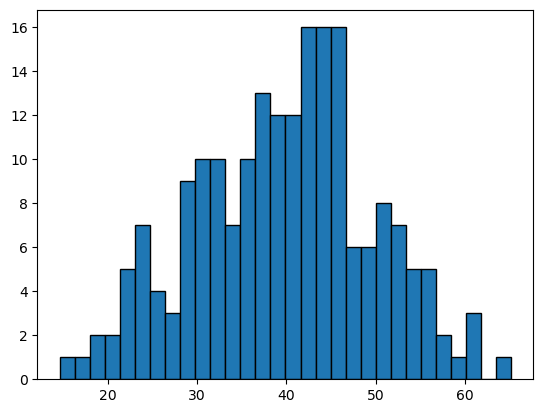

In [53]:
plt.hist(temp[:, 0], bins=30, ec='k')
plt.show()

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
scaler.fit(temp)

MinMaxScaler()

In [57]:
temp_tr = scaler.transform(temp)

In [58]:
temp[:5]

array([[32.41015463],
       [35.70496752],
       [39.81376863],
       [30.83792152],
       [35.0472207 ]])

In [59]:
temp_tr[:5]

array([[0.35135924],
       [0.41665843],
       [0.49808988],
       [0.32019949],
       [0.40362269]])

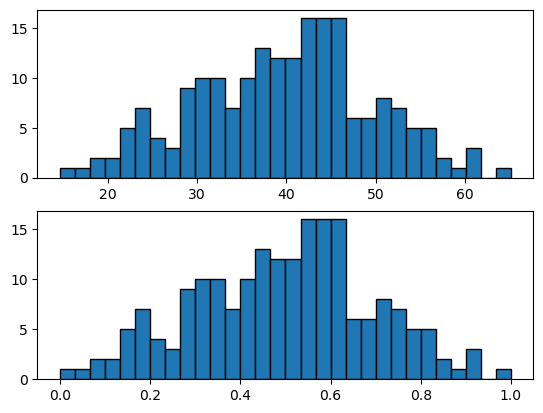

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.hist(temp, bins=30, ec='k')
ax2.hist(temp_tr, bins=30, ec='k')

plt.show()

    why we use standard scaler instead of MinMaxScaler ? 

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
print(temp.mean(), temp.std())

39.69708022385203 9.879812192997377


In [64]:
temp_tr = scaler.fit_transform(temp)
temp_tr[:5]

array([[-0.7375571 ],
       [-0.40406767],
       [ 0.01181079],
       [-0.89669303],
       [-0.4706425 ]])

In [65]:
temp[:5]

array([[32.41015463],
       [35.70496752],
       [39.81376863],
       [30.83792152],
       [35.0472207 ]])

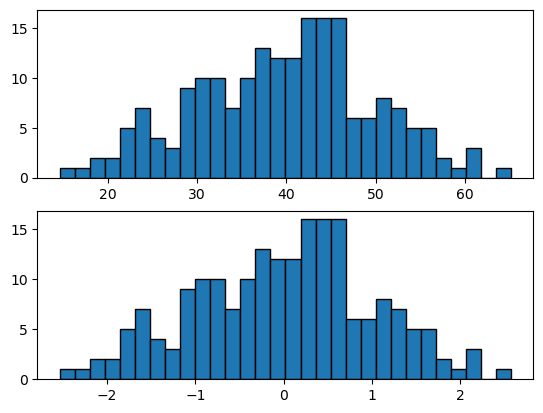

In [66]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.hist(temp, bins=30, ec='k')
ax2.hist(temp_tr, bins=30, ec='k')

plt.show()

#### Transformers 


            obj = Transformer()
            
            obj.fit(X_train) 
            # transformer get statistics from training data which are used to transform data in further steps
            
            X_train_tr = obj.transform(X_train)
            
            X_test_tr = obj.tranform(X_test)
            
       
#### Transformers 


            obj = Transformer()
            
            X_train_tr = obj.fit_transform(X_train) 
            # transformer get statistics from training data which are used to transform data in further step
            
            X_test_tr = obj.tranform(X_test)
            
            

In [67]:
temp = pd.DataFrame({
    "A": [10, 10, 20, 30, 40, 50],
    "B": [500, 600, 900, 700, 800, 500]
})

In [68]:
temp

,A,B
0,10,500
1,10,600
2,20,900
3,30,700
4,40,800
5,50,500


In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler_min_max = MinMaxScaler()
scaler_min_max.fit(temp)

MinMaxScaler()

In [71]:
scaler_min_max.data_max_

array([ 50., 900.])

In [72]:
scaler_min_max.data_min_

array([ 10., 500.])

In [73]:
scaler_min_max.data_range_

array([ 40., 400.])

In [74]:
temp_tr = scaler_min_max.transform(temp)
temp_tr

array([[0.  , 0.  ],
       [0.  , 0.25],
       [0.25, 1.  ],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 0.  ]])

In [75]:
temp

,A,B
0,10,500
1,10,600
2,20,900
3,30,700
4,40,800
5,50,500


In [76]:
X_train_num.head()

,displacement,horsepower,weight,acceleration
178,120.0,88.0,2957,17.0
299,141.0,71.0,3190,24.8
360,145.0,76.0,3160,19.6
313,151.0,90.0,2678,16.5
52,88.0,76.0,2065,14.5


In [77]:
scaler = MinMaxScaler()
X_train_num_tr = scaler.fit_transform(X_train_num)
X_train_num_tr = pd.DataFrame(X_train_num_tr, columns=X_train_num.columns)


In [78]:
X_train_num_tr.head()

,displacement,horsepower,weight,acceleration
0,0.134367,0.228261,0.381060,0.535714
1,0.188630,0.135870,0.447122,1.000000
2,0.198966,0.163043,0.438616,0.690476
3,0.214470,0.239130,0.301956,0.505952
4,0.051680,0.163043,0.128154,0.386905


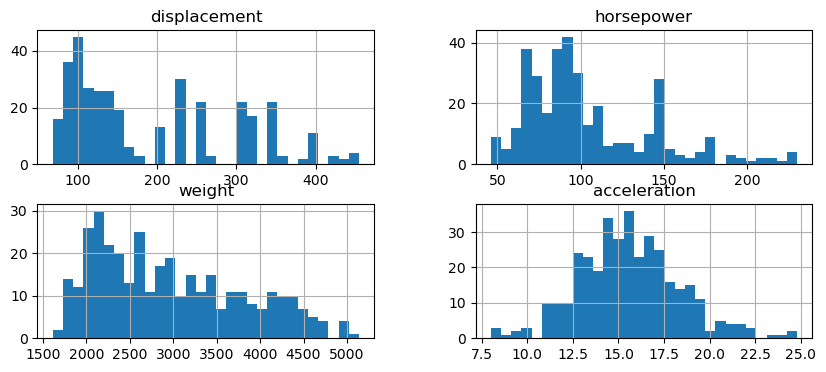

In [79]:
X_train_num.hist(bins=30, figsize=(10, 4))
plt.show()

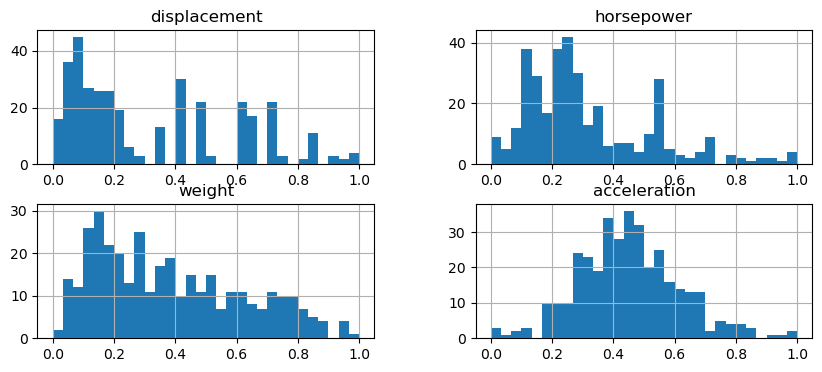

In [80]:
X_train_num_tr.hist(bins=30, figsize=(10, 4))
plt.show()

#### issue in min max scaling

    if your data contains outliers than min max scaling will not work properly

In [81]:
temp

,A,B
0,10,500
1,10,600
2,20,900
3,30,700
4,40,800
5,50,500


In [82]:
temp.mean()

A     26.666667
B    666.666667
dtype: float64

In [83]:
(temp['A'] - temp['A'].mean())/temp["A"].std()

0   -1.020621
1   -1.020621
2   -0.408248
3    0.204124
4    0.816497
5    1.428869
Name: A, dtype: float64

In [84]:
(temp["B"] - temp["B"].mean())/temp["B"].std()

0   -1.020621
1   -0.408248
2    1.428869
3    0.204124
4    0.816497
5   -1.020621
Name: B, dtype: float64

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()
temp_tr = scaler.fit_transform(temp)
temp_tr = pd.DataFrame(temp_tr, columns=["A", "B"])


In [87]:
scaler.mean_

array([ 26.66666667, 666.66666667])

In [88]:
scaler.scale_

array([ 14.90711985, 149.0711985 ])

In [89]:
scaler.var_

array([  222.22222222, 22222.22222222])

In [90]:
temp_tr

,A,B
0,-1.118034,-1.118034
1,-1.118034,-0.447214
2,-0.447214,1.565248
3,0.223607,0.223607
4,0.894427,0.894427
5,1.565248,-1.118034


In [91]:
X_train_num

,displacement,horsepower,weight,acceleration
178,120.0,88.0,2957,17.0
299,141.0,71.0,3190,24.8
360,145.0,76.0,3160,19.6
313,151.0,90.0,2678,16.5
52,88.0,76.0,2065,14.5
...,...,...,...,...
213,350.0,145.0,4055,12.0
95,455.0,225.0,4951,11.0
32,98.0,NaN,2046,19.0
380,120.0,88.0,2160,14.5


In [92]:
imputer = SimpleImputer(strategy="median") # T1
scaler = StandardScaler() # T2


In [93]:
X_train_num_tr = imputer.fit_transform(X_train_num) #  T1 -> missing values treated
X_train_num_tr = scaler.fit_transform(X_train_num_tr) # T2 -> scaled values
X_train_num_tr = pd.DataFrame(X_train_num_tr, columns=X_train_num.columns) 
X_train_num_tr.head()

,displacement,horsepower,weight,acceleration
0,-0.698363,-0.420718,-0.009257,0.512188
1,-0.495700,-0.869847,0.266903,3.328719
2,-0.457097,-0.737751,0.231346,1.451032
3,-0.399193,-0.367879,-0.339937,0.331641
4,-1.007182,-0.737751,-1.066484,-0.390546


In [94]:
X_train_num_tr.isna().sum()

displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

In [95]:
X_test_num_tr = imputer.transform(X_test_num)
X_test_num_tr = scaler.transform(X_test_num_tr)
X_test_num_tr = pd.DataFrame(X_test_num_tr, columns=X_test_num.columns)
X_test_num_tr.head()

,displacement,horsepower,weight,acceleration
0,-0.505350,-0.420718,-0.290157,-0.065562
1,-0.920327,-0.975525,-1.066484,0.801063
2,0.556218,-0.156524,0.663956,1.234375
3,-0.814170,-0.896267,-0.853143,0.476079
4,-0.843122,-0.764170,-0.870921,-0.390546


In [96]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
178,4,120.0,88.0,2957,17.0,75,europe,peugeot 504
299,4,141.0,71.0,3190,24.8,79,europe,peugeot 504
360,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
313,4,151.0,90.0,2678,16.5,80,usa,chevrolet citation
52,4,88.0,76.0,2065,14.5,71,europe,fiat 124b


In [97]:
X_train_num.head()

,displacement,horsepower,weight,acceleration
178,120.0,88.0,2957,17.0
299,141.0,71.0,3190,24.8
360,145.0,76.0,3160,19.6
313,151.0,90.0,2678,16.5
52,88.0,76.0,2065,14.5


In [98]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [99]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std scaler", StandardScaler())
])

In [100]:
X_train_num_tr = num_pipeline.fit_transform(X_train_num)
X_train_num_tr = pd.DataFrame(X_train_num_tr, columns=X_train_num.columns)
X_train_num_tr.head()

,displacement,horsepower,weight,acceleration
0,-0.698363,-0.420718,-0.009257,0.512188
1,-0.495700,-0.869847,0.266903,3.328719
2,-0.457097,-0.737751,0.231346,1.451032
3,-0.399193,-0.367879,-0.339937,0.331641
4,-1.007182,-0.737751,-1.066484,-0.390546


In [101]:
X_test_num_tr = num_pipeline.transform(X_test_num)
X_test_num_tr = pd.DataFrame(X_test_num_tr, columns=X_test_num.columns)
X_test_num_tr.head()

,displacement,horsepower,weight,acceleration
0,-0.505350,-0.420718,-0.290157,-0.065562
1,-0.920327,-0.975525,-1.066484,0.801063
2,0.556218,-0.156524,0.663956,1.234375
3,-0.814170,-0.896267,-0.853143,0.476079
4,-0.843122,-0.764170,-0.870921,-0.390546


In [102]:
temp = pd.DataFrame({
    "Review": ["good", "avg", "best", "worst", "good"],
    "Grade": ["A", "B", "A", "C", "B"]
})

In [103]:
temp

,Review,Grade
0,good,A
1,avg,B
2,best,A
3,worst,C
4,good,B


In [104]:
from sklearn.preprocessing import OrdinalEncoder

In [105]:
ord_enc = OrdinalEncoder()
temp_tr = ord_enc.fit_transform(temp)
temp_tr = pd.DataFrame(temp_tr, columns=temp.columns)

In [106]:
ord_enc.categories_

[array(['avg', 'best', 'good', 'worst'], dtype=object),
 array(['A', 'B', 'C'], dtype=object)]

In [107]:
temp.head()

,Review,Grade
0,good,A
1,avg,B
2,best,A
3,worst,C
4,good,B


In [108]:
temp_tr

,Review,Grade
0,2.0,0.0
1,0.0,1.0
2,1.0,0.0
3,3.0,2.0
4,2.0,1.0


In [109]:
ordinal_cat_features

['cylinders']

In [110]:
X_train_ord_cat = X_train[ordinal_cat_features]

In [111]:
X_train_ord_cat.head() # we can pass this as it is

,cylinders
178,4
299,4
360,6
313,4
52,4


In [112]:
X_train_ord_cat["cylinders"].unique()
# 3 - 0, 4 - 1, 5-2, 6-3, 8-4

array([4, 6, 8, 3, 5], dtype=int64)

In [113]:
from sklearn.preprocessing import OrdinalEncoder

In [114]:
ord_enc = OrdinalEncoder()
X_train_ord_cat_tr = ord_enc.fit_transform(X_train_ord_cat)
X_train_ord_cat_tr = pd.DataFrame(X_train_ord_cat_tr, columns=X_train_ord_cat.columns)
X_train_ord_cat_tr.head()

,cylinders
0,1.0
1,1.0
2,3.0
3,1.0
4,1.0


In [115]:
X_test_ord_cat = X_test[ordinal_cat_features]
X_test_ord_cat_tr = ord_enc.transform(X_test_ord_cat)
X_test_ord_cat_tr = pd.DataFrame(X_test_ord_cat_tr, columns=X_test_ord_cat.columns)

In [116]:
X_test_ord_cat.head()

,cylinders
255,4
346,4
228,6
382,4
269,4


In [117]:
X_test_ord_cat_tr.head()

,cylinders
0,1.0
1,1.0
2,3.0
3,1.0
4,1.0


In [118]:
temp = pd.DataFrame({
    "gender": ["M", "F", "F", "M", "F", "M", "F", "M"],
    "country": ["IND", "UK", "US", "IND", "IND", "US", "UK", "US"]
})

In [119]:
temp

,gender,country
0,M,IND
1,F,UK
2,F,US
3,M,IND
4,F,IND
5,M,US
6,F,UK
7,M,US


In [120]:
from sklearn.preprocessing import OneHotEncoder

one_hot_enc = OneHotEncoder()
temp_tr = one_hot_enc.fit_transform(temp).toarray()
one_hot_enc.categories_

[array(['F', 'M'], dtype=object), array(['IND', 'UK', 'US'], dtype=object)]

In [121]:
columns = []
for cat_ in one_hot_enc.categories_:
    columns.extend(cat_)
columns

['F', 'M', 'IND', 'UK', 'US']

In [122]:
temp_tr = pd.DataFrame(temp_tr, columns=columns)
temp_tr

,F,M,IND,UK,US
0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,1.0


In [123]:
temp

,gender,country
0,M,IND
1,F,UK
2,F,US
3,M,IND
4,F,IND
5,M,US
6,F,UK
7,M,US


In [124]:
nominal_cat_features

['origin']

In [125]:
X_train_nominal_cat = X_train[nominal_cat_features]
X_test_nominal_cat = X_test[nominal_cat_features]

In [126]:
one_hot_enc = OneHotEncoder()
X_train_nominal_cat_tr = one_hot_enc.fit_transform(X_train_nominal_cat).toarray()

In [127]:
columns = []
for cat_ in one_hot_enc.categories_:
    columns.extend(cat_)
columns

['europe', 'japan', 'usa']

In [128]:
X_train_nominal_cat_tr = pd.DataFrame(X_train_nominal_cat_tr, columns=columns)
X_test_nominal_cat_tr = pd.DataFrame(one_hot_enc.transform(X_test_nominal_cat).toarray(), columns=columns)

In [129]:
X_train_nominal_cat_tr.head()

,europe,japan,usa
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [130]:
X_test_nominal_cat_tr.head()

,europe,japan,usa
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [131]:
X_train_num_tr.head()

,displacement,horsepower,weight,acceleration
0,-0.698363,-0.420718,-0.009257,0.512188
1,-0.495700,-0.869847,0.266903,3.328719
2,-0.457097,-0.737751,0.231346,1.451032
3,-0.399193,-0.367879,-0.339937,0.331641
4,-1.007182,-0.737751,-1.066484,-0.390546


In [132]:
X_train_ord_cat_tr.head()

,cylinders
0,1.0
1,1.0
2,3.0
3,1.0
4,1.0


In [133]:
X_train_nominal_cat_tr.head()

,europe,japan,usa
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [134]:
X_train_tr = pd.concat([
    X_train_num_tr, 
    X_train_ord_cat_tr,
    X_train_nominal_cat_tr], axis=1
)

In [135]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
178,4,120.0,88.0,2957,17.0,75,europe,peugeot 504
299,4,141.0,71.0,3190,24.8,79,europe,peugeot 504
360,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
313,4,151.0,90.0,2678,16.5,80,usa,chevrolet citation
52,4,88.0,76.0,2065,14.5,71,europe,fiat 124b


In [136]:
X_train_tr.head()

,displacement,horsepower,weight,acceleration,cylinders,europe,japan,usa
0,-0.698363,-0.420718,-0.009257,0.512188,1.0,1.0,0.0,0.0
1,-0.495700,-0.869847,0.266903,3.328719,1.0,1.0,0.0,0.0
2,-0.457097,-0.737751,0.231346,1.451032,3.0,1.0,0.0,0.0
3,-0.399193,-0.367879,-0.339937,0.331641,1.0,0.0,0.0,1.0
4,-1.007182,-0.737751,-1.066484,-0.390546,1.0,1.0,0.0,0.0


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [138]:
model1 = LinearRegression()
model2 = LinearRegression()

In [139]:
model1.fit(X_train_num_tr, y_train)
model2.fit(X_train_tr, y_train)

LinearRegression()

In [140]:
acc1 = r2_score(y_train, model1.predict(X_train_num_tr))
acc2 = r2_score(y_train, model2.predict(X_train_tr))


In [141]:
print(f"only numerical accuracy: {acc1*100:0.2f}")
print(f"numerical + categorical accuracy: {acc2*100:0.2f}")

only numerical accuracy: 70.69
numerical + categorical accuracy: 72.29
